### The DogeCoin currency was derived from the open source software project, Litecoin. Unlike Bitcoin. Dogecoin does not have a limit to the number of coins that can be produced in the system.

In [84]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [4]:
# Read the csv files containin the tweets by Eon Musk from 2010 to 2022 for DogeCOin, Tesla, spaceX, twitter.
doge_txtblob = pd.read_csv('csv/doge_txtblob.csv')
doge_vader = pd.read_csv('csv/doge_vader.csv')
doge_price = pd.read_csv('csv/doge_price.csv')

In [3]:
doge_txtblob

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
0,2019-04-02,Dogecoin value may vary,NaN,20160.0,1080.0,1959.0,NaN,NaN,0.000,0.000,Neutral
1,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,NaN,9063.0,558.0,2428.0,NaN,NaN,0.825,0.300,Positive
2,2019-04-02,Dogecoin rulz,NaN,138893.0,1732.0,16539.0,NaN,NaN,0.000,0.000,Neutral
3,2020-04-25,Dogecoin Mode,NaN,2192.0,124.0,207.0,NaN,NaN,0.000,0.000,Neutral
4,2020-07-18,"Excuse me, I only sell Doge!",NaN,15930.0,416.0,775.0,NaN,NaN,0.525,-0.025,Negative
...,...,...,...,...,...,...,...,...,...,...,...
63,2021-12-14,Tesla will make some merch buyable with Doge &...,363960.0,NaN,NaN,NaN,49984.0,53938.0,0.000,0.000,Neutral
64,2021-12-23,That’s why I’m pro Doge,30980.0,NaN,NaN,NaN,4203.0,6149.0,0.000,0.000,Neutral
65,2022-01-14,Tesla merch buyable with Dogecoin,332825.0,NaN,NaN,NaN,38725.0,51727.0,0.000,0.000,Neutral
66,2022-01-25,I will eat a happy meal on tv if accepts Dogecoin,422498.0,NaN,NaN,NaN,31009.0,59390.0,1.000,0.800,Positive


In [6]:
doge_price.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
5,2017-11-14,0.001201,0.001239,0.001131,0.001184,0.001184,2660340
6,2017-11-15,0.001189,0.001351,0.001179,0.001339,0.001339,2840180
7,2017-11-16,0.001348,0.001424,0.001286,0.001390,0.001390,3423010
8,2017-11-17,0.001381,0.001394,0.001274,0.001313,0.001313,2787480
9,2017-11-18,0.001308,0.001385,0.001254,0.001373,0.001373,1648260


In [75]:
doge_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1707 non-null   datetime64[ns]
 1   Open       1707 non-null   float64       
 2   High       1707 non-null   float64       
 3   Low        1707 non-null   float64       
 4   Close      1707 non-null   float64       
 5   Adj Close  1707 non-null   float64       
 6   Volume     1707 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 93.5 KB


In [7]:
doge_price.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
doge_price['Date'] = pd.to_datetime(doge_price['Date'], format='%Y-%m-%d')

### Dogecoin started in 2013. Elon Musk tweeted about dogecoin first in 2019. Hence we would start analysing the tweets and the price trends for years 2019, 2020, 2021, 2022.

In [10]:
doge2019 = doge_txtblob.loc[(doge_txtblob['Date'] >= '2019-01-01')
                     & (doge_txtblob['Date'] < '2019-12-31')]
doge2019

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
0,2019-04-02,Dogecoin value may vary,NaN,20160.0,1080.0,1959.0,NaN,NaN,0.000,0.0,Neutral
1,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,NaN,9063.0,558.0,2428.0,NaN,NaN,0.825,0.3,Positive
2,2019-04-02,Dogecoin rulz,NaN,138893.0,1732.0,16539.0,NaN,NaN,0.000,0.0,Neutral


In [15]:
doge2019[doge2019["Sentiment"] == "Positive"]["Tweet"]

1    Dogecoin might be my fav cryptocurrency. It’s ...
Name: Tweet, dtype: object

In [17]:
doge_price2019 = doge_price.loc[(doge_price['Date'] >= '2019-01-01')
                     & (doge_price['Date'] < '2019-12-31')]
doge_price2019

,Date,Open,High,Low,Close,Adj Close,Volume
418,2019-01-01,0.002346,0.002392,0.002322,0.002392,0.002392,17364744
419,2019-01-02,0.002388,0.002458,0.002372,0.002407,0.002407,18015392
420,2019-01-03,0.002404,0.002414,0.002356,0.002360,0.002360,17619234
421,2019-01-04,0.002364,0.002397,0.002274,0.002315,0.002315,19530100
422,2019-01-05,0.002320,0.002350,0.002280,0.002319,0.002319,17148586
...,...,...,...,...,...,...,...
777,2019-12-26,0.002086,0.002098,0.002047,0.002058,0.002058,71906467
778,2019-12-27,0.002059,0.002075,0.002032,0.002053,0.002053,75486740
779,2019-12-28,0.002053,0.002090,0.002051,0.002064,0.002064,64539193
780,2019-12-29,0.002063,0.002114,0.002056,0.002068,0.002068,67109832


In [19]:
doge_price2019["Date"].dt.month

418     1
419     1
420     1
421     1
422     1
       ..
777    12
778    12
779    12
780    12
781    12
Name: Date, Length: 364, dtype: int64

In [24]:
# top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
# top_plt.plot(doge_price2019["Date"], doge_price2019["Close"])
# plt.title('Historical stock prices of Doge Coin in 2019')
# # bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
# # bottom_plt.bar(doge_price["Date"], doge_price['Volume'])
# # plt.title('\nDoge Coin Trading Volume', y=-0.60)
# plt.gcf().set_size_inches(12,8)

Text(2019-04-02 00:00:00, 0.00225, 'Dogecoin rulz')

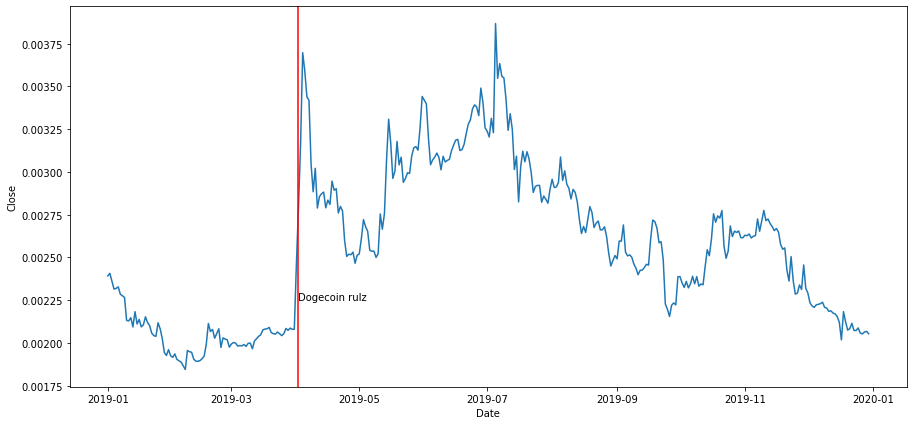

In [32]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=doge_price2019["Date"], y=doge_price2019["Close"])
x = pd.Timestamp('2019-04-02')
plt.axvline(x,color='r')
ax.annotate('Dogecoin rulz', xy =(x, 0.00225),xytext =(x,0.00225))

<AxesSubplot:xlabel='Date', ylabel='Volume'>

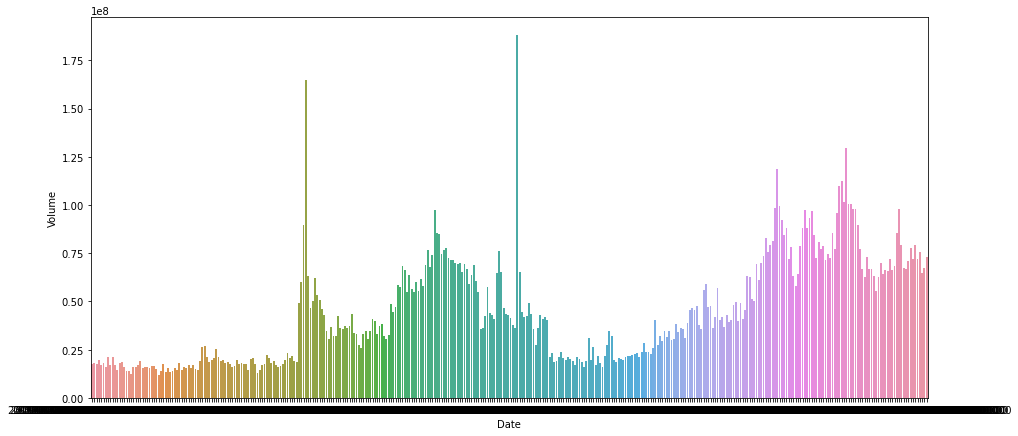

In [29]:
plt.figure(figsize=(15, 7))
sns.barplot(x=doge_price2019["Date"], y=doge_price2019["Volume"])

In [33]:
doge2020 = doge_txtblob.loc[(doge_txtblob['Date'] >= '2020-01-01')
                     & (doge_txtblob['Date'] < '2020-12-31')]
doge2020

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
3,2020-04-25,Dogecoin Mode,NaN,2192.0,124.0,207.0,NaN,NaN,0.000,0.000,Neutral
4,2020-07-18,"Excuse me, I only sell Doge!",NaN,15930.0,416.0,775.0,NaN,NaN,0.525,-0.025,Negative
5,2020-11-17,Dojo/Doge,NaN,1002.0,81.0,62.0,NaN,NaN,0.000,0.000,Neutral
6,2020-12-20,One word: Doge,NaN,224342.0,11227.0,26570.0,NaN,NaN,0.000,0.000,Neutral


In [34]:
doge_price2020 = doge_price.loc[(doge_price['Date'] >= '2020-01-01')
                     & (doge_price['Date'] < '2020-12-31')]
doge_price2020

,Date,Open,High,Low,Close,Adj Close,Volume
783,2020-01-01,0.002028,0.002052,0.002021,0.002033,0.002033,51180941
784,2020-01-02,0.002034,0.002110,0.001983,0.002009,0.002009,65071106
785,2020-01-03,0.002008,0.002177,0.001991,0.002145,0.002145,62619988
786,2020-01-04,0.002144,0.002490,0.002050,0.002241,0.002241,94227582
787,2020-01-05,0.002240,0.002491,0.002117,0.002419,0.002419,52631740
...,...,...,...,...,...,...,...
1143,2020-12-26,0.004581,0.004640,0.004423,0.004494,0.004494,151728507
1144,2020-12-27,0.004493,0.004805,0.004429,0.004548,0.004548,154526399
1145,2020-12-28,0.004548,0.004716,0.004523,0.004592,0.004592,99641525
1146,2020-12-29,0.004592,0.004608,0.004278,0.004486,0.004486,90876497


C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


Text(0.5, 1.0, 'Dogecoin 2020')

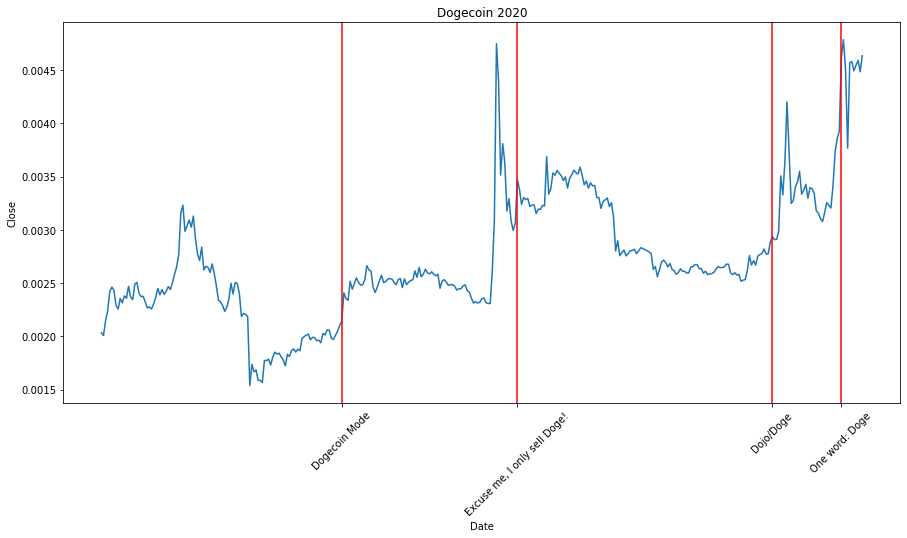

In [36]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=doge_price2020["Date"], y=doge_price2020["Close"])
for i in doge2020.Date:
    x = pd.Timestamp(i)
    plt.axvline(x,color='r')

ax.set_xticklabels(doge2020.Tweet, rotation=45)
ax.set_xticks(doge2020.Date) 
ax.set_title("Dogecoin 2020")

# x = pd.Timestamp('2019-04-02')
# plt.axvline(x,color='r')
# ax.annotate('Dogecoin rulz', xy =(x, 0.00225),xytext =(x,0.00225))

In [37]:
doge2021 = doge_txtblob.loc[(doge_txtblob['Date'] >= '2021-01-01')
                     & (doge_txtblob['Date'] < '2021-12-31')]
doge2021

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
7,2021-02-04,"No highs, no lows, only Doge",744715.0,NaN,NaN,NaN,21310.0,107141.0,1.000000,0.000000,Neutral
8,2021-02-04,Dogecoin is the people’s crypto,533684.0,NaN,NaN,NaN,18465.0,97994.0,0.000000,0.000000,Neutral
9,2021-02-04,Doge,250972.0,NaN,NaN,NaN,8898.0,42983.0,0.000000,0.000000,Neutral
10,2021-02-06,Dogecake,9304.0,NaN,NaN,NaN,403.0,1306.0,0.000000,0.000000,Neutral
11,2021-02-08,"Doge appears to be inflationary, but is not me...",14932.0,NaN,NaN,NaN,1123.0,3349.0,0.150000,-0.125000,Negative
12,2021-02-08,🎶 Who let the Doge out 🎶,758030.0,NaN,NaN,NaN,25822.0,108137.0,0.000000,0.000000,Neutral
13,2021-02-10,"Bought some Dogecoin for lil X, so he can be a...",528221.0,NaN,NaN,NaN,27411.0,55822.0,0.000000,0.000000,Neutral
14,2021-02-11,"Frodo was the underdoge, All thought he would ...",239080.0,NaN,NaN,NaN,18772.0,28834.0,0.400000,0.000000,Neutral
15,2021-02-12,Doge is underestimated,28121.0,NaN,NaN,NaN,2092.0,8340.0,0.000000,0.000000,Neutral
16,2021-02-15,If major Dogecoin holders sell most of their c...,318028.0,NaN,NaN,NaN,27269.0,32898.0,0.508333,0.218750,Positive


In [48]:
doge2021.sort_values(by=['retweets_count'], inplace=True, ascending=False)
doge2021

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,subjectivity,polarity,Sentiment
33,2021-05-10,SpaceX launching satellite Doge-1 to the moon ...,526966.0,NaN,NaN,NaN,34932.0,112129.0,0.000000,0.000000,Neutral
12,2021-02-08,🎶 Who let the Doge out 🎶,758030.0,NaN,NaN,NaN,25822.0,108137.0,0.000000,0.000000,Neutral
7,2021-02-04,"No highs, no lows, only Doge",744715.0,NaN,NaN,NaN,21310.0,107141.0,1.000000,0.000000,Neutral
8,2021-02-04,Dogecoin is the people’s crypto,533684.0,NaN,NaN,NaN,18465.0,97994.0,0.000000,0.000000,Neutral
34,2021-05-11,Do you want Tesla to accept Doge?,392471.0,NaN,NaN,NaN,96563.0,94898.0,0.000000,0.000000,Neutral
35,2021-05-14,Working with Doge devs to improve system trans...,534265.0,NaN,NaN,NaN,63615.0,82255.0,0.500000,0.200000,Positive
32,2021-04-28,The Dogefather SNL May 8,446797.0,NaN,NaN,NaN,36406.0,74357.0,0.000000,0.000000,Neutral
13,2021-02-10,"Bought some Dogecoin for lil X, so he can be a...",528221.0,NaN,NaN,NaN,27411.0,55822.0,0.000000,0.000000,Neutral
63,2021-12-14,Tesla will make some merch buyable with Doge &...,363960.0,NaN,NaN,NaN,49984.0,53938.0,0.000000,0.000000,Neutral
41,2021-05-20,How much is that Doge in the window?,302873.0,NaN,NaN,NaN,70818.0,52441.0,0.200000,0.200000,Positive


In [54]:
x = doge2021.groupby(["Date"],as_index = False)
x

In [73]:
top = doge2021.sort_values("likes_count", ascending=False)[["Date","Tweet"]][:5]
top

,Date,Tweet
12,2021-02-08,🎶 Who let the Doge out 🎶
7,2021-02-04,"No highs, no lows, only Doge"
35,2021-05-14,Working with Doge devs to improve system trans...
8,2021-02-04,Dogecoin is the people’s crypto
29,2021-04-01,SpaceX is going to put a literal Dogecoin on t...


In [70]:
top.groupby(["Date"])["Tweet"]

In [43]:
doge2021_vader = doge_vader.loc[(doge_vader['Date'] >= '2021-01-01')
                     & (doge_vader['Date'] < '2021-12-31')]
doge2021_vader

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,compound_sc,negative_sc,neutral_sc,positive_sc
7,2021-02-04,"No highs, no lows, only Doge",744715.0,NaN,NaN,NaN,21310.0,107141.0,-0.6369,0.674,0.326,0.000
8,2021-02-04,Dogecoin is the people’s crypto,533684.0,NaN,NaN,NaN,18465.0,97994.0,0.0000,0.000,1.000,0.000
9,2021-02-04,Doge,250972.0,NaN,NaN,NaN,8898.0,42983.0,0.0000,0.000,1.000,0.000
10,2021-02-06,Dogecake,9304.0,NaN,NaN,NaN,403.0,1306.0,0.0000,0.000,1.000,0.000
11,2021-02-08,"Doge appears to be inflationary, but is not me...",14932.0,NaN,NaN,NaN,1123.0,3349.0,-0.3291,0.145,0.766,0.089
12,2021-02-08,🎶 Who let the Doge out 🎶,758030.0,NaN,NaN,NaN,25822.0,108137.0,0.0000,0.000,1.000,0.000
13,2021-02-10,"Bought some Dogecoin for lil X, so he can be a...",528221.0,NaN,NaN,NaN,27411.0,55822.0,0.0000,0.000,1.000,0.000
14,2021-02-11,"Frodo was the underdoge, All thought he would ...",239080.0,NaN,NaN,NaN,18772.0,28834.0,-0.5423,0.226,0.774,0.000
15,2021-02-12,Doge is underestimated,28121.0,NaN,NaN,NaN,2092.0,8340.0,-0.2732,0.512,0.488,0.000
16,2021-02-15,If major Dogecoin holders sell most of their c...,318028.0,NaN,NaN,NaN,27269.0,32898.0,0.4019,0.000,0.895,0.105


In [71]:
doge_price2021 = doge_price.loc[(doge_price['Date'] >= '2021-01-01')
                     & (doge_price['Date'] < '2021-12-31')]
doge_price2021

,Date,Open,High,Low,Close,Adj Close,Volume
1149,2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,228961515
1150,2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3421562680
1151,2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2707003608
1152,2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1372398979
1153,2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,687256067
...,...,...,...,...,...,...,...
1508,2021-12-26,0.190567,0.192546,0.185646,0.190020,0.190020,650674078
1509,2021-12-27,0.189986,0.192923,0.187239,0.187705,0.187705,666773423
1510,2021-12-28,0.187847,0.187885,0.172738,0.174117,0.174117,954075337
1511,2021-12-29,0.174095,0.177339,0.166760,0.167765,0.167765,823628336


C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


Text(0.5, 1.0, 'Dogecoin 2021')

C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


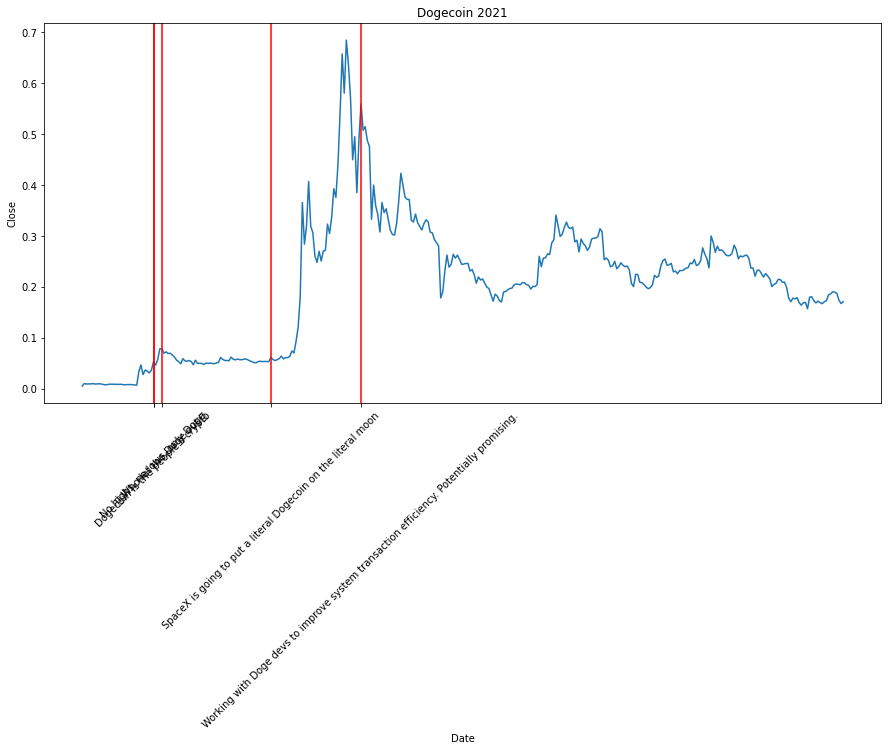

In [74]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=doge_price2021["Date"], y=doge_price2021["Close"])
for i in top.Date:
    x = pd.Timestamp(i)
    plt.axvline(x,color='r')

ax.set_xticklabels(top.Tweet, rotation=45)
ax.set_xticks(top.Date) 
ax.set_title("Dogecoin 2021")


In [78]:
doge_vader.dtypes

Date               object
Tweet              object
likes_count       float64
nlikes            float64
nreplies          float64
nretweets         float64
replies_count     float64
retweets_count    float64
compound_sc       float64
negative_sc       float64
neutral_sc        float64
positive_sc       float64
dtype: object

In [79]:
doge_vader['Date'] = pd.to_datetime(doge_vader['Date'], format='%Y-%m-%d')

In [80]:
joint_df = pd.merge(doge_vader,doge_price, how = "left", left_on=["Date"], right_on=["Date"])
joint_df

,Date,Tweet,likes_count,nlikes,nreplies,nretweets,replies_count,retweets_count,compound_sc,negative_sc,neutral_sc,positive_sc,Open,High,Low,Close,Adj Close,Volume
0,2019-04-02,Dogecoin value may vary,NaN,20160.0,1080.0,1959.0,NaN,NaN,0.3400,0.0,0.556,0.444,0.002459,0.002863,0.002394,0.002795,0.002795,60298362
1,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,NaN,9063.0,558.0,2428.0,NaN,NaN,0.8176,0.0,0.414,0.586,0.002459,0.002863,0.002394,0.002795,0.002795,60298362
2,2019-04-02,Dogecoin rulz,NaN,138893.0,1732.0,16539.0,NaN,NaN,0.0000,0.0,1.000,0.000,0.002459,0.002863,0.002394,0.002795,0.002795,60298362
3,2020-04-25,Dogecoin Mode,NaN,2192.0,124.0,207.0,NaN,NaN,0.0000,0.0,1.000,0.000,0.002102,0.002146,0.002087,0.002142,0.002142,229810398
4,2020-07-18,"Excuse me, I only sell Doge!",NaN,15930.0,416.0,775.0,NaN,NaN,0.1511,0.0,0.715,0.285,0.003060,0.003629,0.003031,0.003473,0.003473,204080851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2021-12-14,Tesla will make some merch buyable with Doge &...,363960.0,NaN,NaN,NaN,49984.0,53938.0,0.0000,0.0,1.000,0.000,0.157465,0.219632,0.155447,0.180157,0.180157,6411471551
64,2021-12-23,That’s why I’m pro Doge,30980.0,NaN,NaN,NaN,4203.0,6149.0,0.0000,0.0,1.000,0.000,0.173209,0.184522,0.171740,0.184490,0.184490,1184481683
65,2022-01-14,Tesla merch buyable with Dogecoin,332825.0,NaN,NaN,NaN,38725.0,51727.0,0.0000,0.0,1.000,0.000,0.172053,0.203232,0.171283,0.183549,0.183549,5784004926
66,2022-01-25,I will eat a happy meal on tv if accepts Dogecoin,422498.0,NaN,NaN,NaN,31009.0,59390.0,0.7184,0.0,0.538,0.462,0.137784,0.147236,0.133235,0.143049,0.143049,1347567750


In [81]:
final_doge_df = joint_df[["Date","Close","Volume","compound_sc","negative_sc","neutral_sc","positive_sc"]]
final_doge_df

,Date,Close,Volume,compound_sc,negative_sc,neutral_sc,positive_sc
0,2019-04-02,0.002795,60298362,0.3400,0.0,0.556,0.444
1,2019-04-02,0.002795,60298362,0.8176,0.0,0.414,0.586
2,2019-04-02,0.002795,60298362,0.0000,0.0,1.000,0.000
3,2020-04-25,0.002142,229810398,0.0000,0.0,1.000,0.000
4,2020-07-18,0.003473,204080851,0.1511,0.0,0.715,0.285
...,...,...,...,...,...,...,...
63,2021-12-14,0.180157,6411471551,0.0000,0.0,1.000,0.000
64,2021-12-23,0.184490,1184481683,0.0000,0.0,1.000,0.000
65,2022-01-14,0.183549,5784004926,0.0000,0.0,1.000,0.000
66,2022-01-25,0.143049,1347567750,0.7184,0.0,0.538,0.462


In [82]:
final_doge_df.set_index("Date",inplace = True)
final_doge_df

,Close,Volume,compound_sc,negative_sc,neutral_sc,positive_sc
Date,,,,,,
2019-04-02,0.002795,60298362,0.3400,0.0,0.556,0.444
2019-04-02,0.002795,60298362,0.8176,0.0,0.414,0.586
2019-04-02,0.002795,60298362,0.0000,0.0,1.000,0.000
2020-04-25,0.002142,229810398,0.0000,0.0,1.000,0.000
2020-07-18,0.003473,204080851,0.1511,0.0,0.715,0.285
...,...,...,...,...,...,...
2021-12-14,0.180157,6411471551,0.0000,0.0,1.000,0.000
2021-12-23,0.184490,1184481683,0.0000,0.0,1.000,0.000
2022-01-14,0.183549,5784004926,0.0000,0.0,1.000,0.000


In [90]:
def train_test_split(df, test_size=0.3):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(final_doge_df, test_size=0.2)

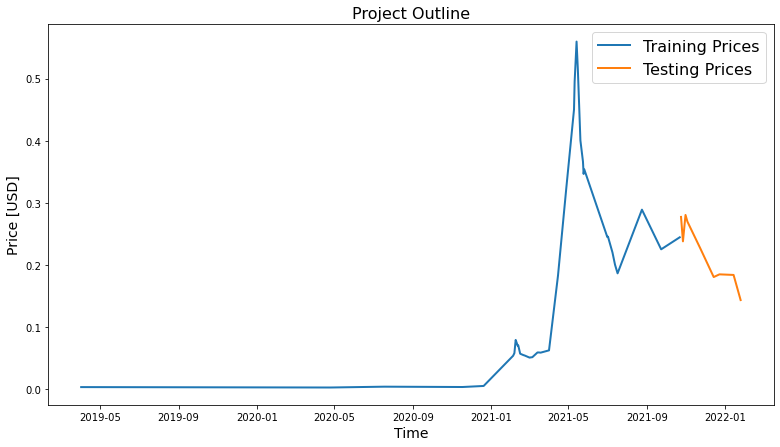

In [91]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Price [USD]', fontsize=14)
    ax.set_xlabel('Time', fontsize = 14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
line_plot(train["Close"], test["Close"], 'Training Prices', 'Testing Prices', title='Project Outline')

In [94]:
train

,Close,Volume,compound_sc,negative_sc,neutral_sc,positive_sc
Date,,,,,,
2019-04-02,0.002795,60298362,0.3400,0.000,0.556,0.444
2019-04-02,0.002795,60298362,0.8176,0.000,0.414,0.586
2019-04-02,0.002795,60298362,0.0000,0.000,1.000,0.000
2020-04-25,0.002142,229810398,0.0000,0.000,1.000,0.000
2020-07-18,0.003473,204080851,0.1511,0.000,0.715,0.285
2020-11-17,0.002936,46631464,0.0000,0.000,1.000,0.000
2020-12-20,0.004625,508066004,0.0000,0.000,1.000,0.000
2021-02-04,0.053289,13040837601,-0.6369,0.674,0.326,0.000
2021-02-04,0.053289,13040837601,0.0000,0.000,1.000,0.000


In [95]:
test

,Close,Volume,compound_sc,negative_sc,neutral_sc,positive_sc
Date,,,,,,
2021-10-24,0.277048,5278760541,0.6696,0.000,0.882,0.118
2021-10-24,0.277048,5278760541,0.6369,0.000,0.874,0.126
2021-10-27,0.237690,5022822846,0.3182,0.000,0.813,0.187
2021-10-31,0.280244,4224104205,0.0000,0.000,1.000,0.000
2021-11-03,0.269407,2091380862,0.6588,0.000,0.761,0.239
2021-11-23,0.226512,1907278849,0.4133,0.129,0.593,0.278
2021-11-23,0.226512,1907278849,0.0000,0.000,1.000,0.000
2021-11-23,0.226512,1907278849,-0.8160,0.199,0.801,0.000
2021-12-14,0.180157,6411471551,0.0000,0.000,1.000,0.000


In [93]:
tuned_parameters = [{"max_depth":[10,20],
                    "n_estimators":[10,20],
                    "max_features":["sqrt",0.2]}]
random_clf = RandomForestClassifier()
clf = GridSearchCV(random_clf, tuned_parameters, cv =5, scoring = "roc_auc")
clf.fit(train,test)

ValueError: Found input variables with inconsistent numbers of samples: [55, 13]